In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/imdb_movies_clean_1st.csv")

In [3]:
df.head()

,Unnamed: 0,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description
0,0,tt0000009,Miss Jerry,1894,Romance,45,USA,0,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.
1,1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,0,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...
2,2,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",0,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...
3,3,tt0002101,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...
4,4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...


In [4]:
# We select the first 16 which are individual countries only
ind_count = df.country.value_counts()[:16]

<AxesSubplot:>

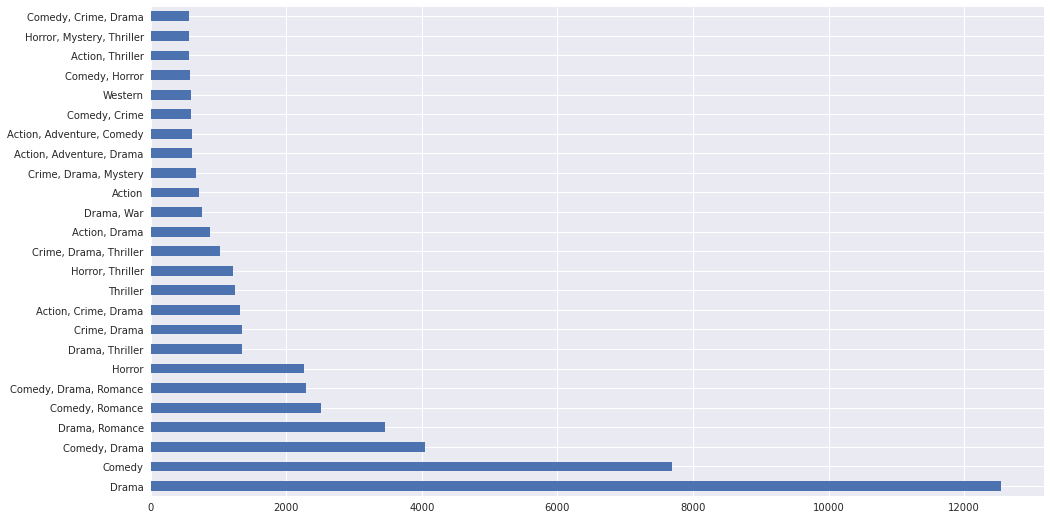

In [5]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9.0)
df['genre'].value_counts()[:25].plot(kind='barh')

<AxesSubplot:>

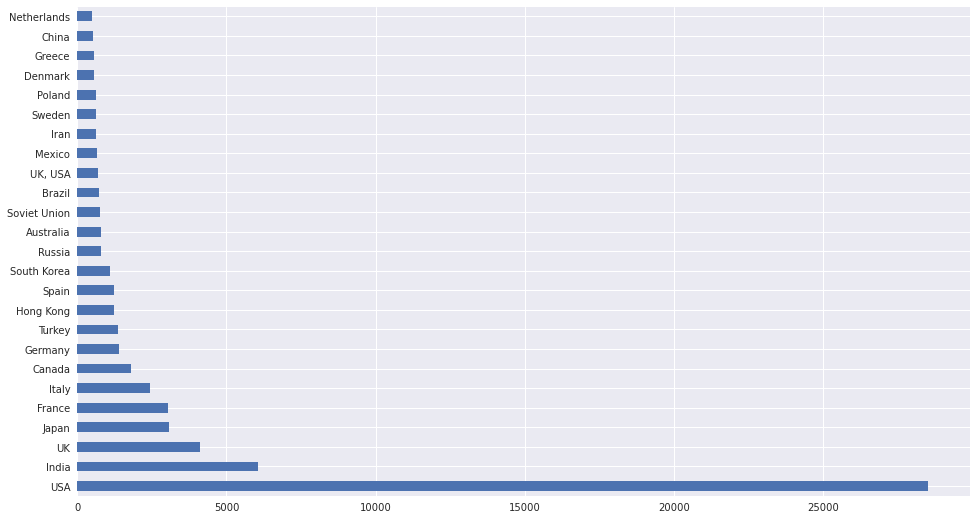

In [6]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9.0)
df['country'].value_counts()[:25].plot(kind='barh')

<AxesSubplot:>

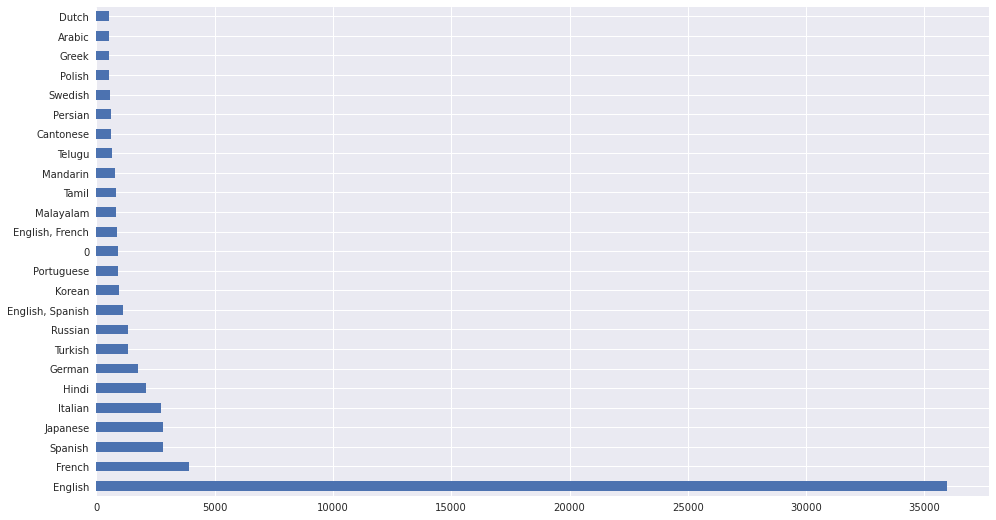

In [7]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9.0)
df['language'].value_counts()[:25].plot(kind='barh')

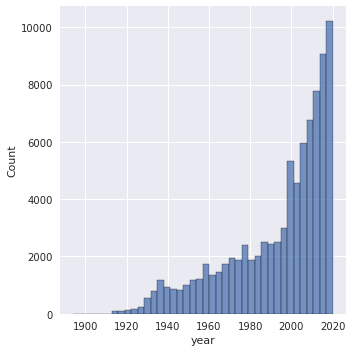

In [8]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9.0)
sns.displot(df["year"], kde=False, bins=40)

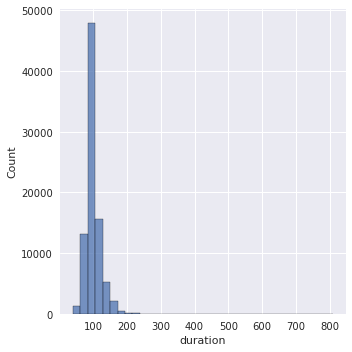

In [9]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 9.0)
sns.displot(df["duration"], kde=False, bins=35)
# We can do bins with duration and convert it to categorical data for example <30min, <60, <90,...

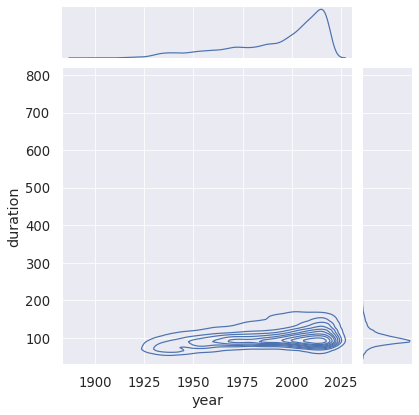

In [10]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.5)
sns.jointplot(x='year', y='duration', data=df, kind='kde')

In [11]:
len(list(df.country.unique()))

4908

/home/guillermo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

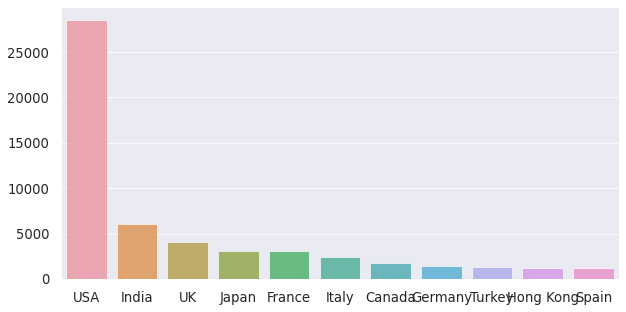

In [12]:
country_count = df.country.value_counts()
country_count = country_count[:11]
plt.figure(figsize=(10,5))
sns.barplot(country_count.index, country_count.values, alpha=0.8)

In [13]:
# Qué país hace más cine? 
# Qué idomas son los más trasmitidos
# Cuánto duran las pelis de media? o cuánto duran?
# Production companies?
# Votes are total? and reviews?
# Obviously genre compared with something?
# Do titles tell something about their country of origin or theme/genre?
# 

In [14]:
pd.DataFrame(df.genre.value_counts())

,genre
Drama,12543
Comedy,7693
"Comedy, Drama",4039
"Drama, Romance",3455
"Comedy, Romance",2508
...,...
"Mystery, Sci-Fi, Drama",1
"Comedy, Adventure, Family",1
"Comedy, Musical, Thriller",1
"Action, Biography, Western",1


In [16]:
pd.DataFrame(df.genre.value_counts(normalize=True))

,genre
Drama,0.146095
Comedy,0.089605
"Comedy, Drama",0.047044
"Drama, Romance",0.040242
"Comedy, Romance",0.029212
...,...
"Mystery, Sci-Fi, Drama",0.000012
"Comedy, Adventure, Family",0.000012
"Comedy, Musical, Thriller",0.000012
"Action, Biography, Western",0.000012


In [15]:
pd.DataFrame(df.country.value_counts())

,country
USA,28511
India,6065
UK,4111
Japan,3077
France,3055
...,...
"Denmark, Iceland, Norway",1
"Mexico, France, Belgium, Germany",1
"UK, Germany, Kenya, France, USA, China",1
"Germany, Ireland, Taiwan",1


In [34]:
pd.DataFrame(df.country.value_counts(normalize=True))

,country
USA,0.332083
India,0.070642
UK,0.047883
Japan,0.035839
France,0.035583
...,...
"Denmark, Iceland, Norway",0.000012
"Mexico, France, Belgium, Germany",0.000012
"UK, Germany, Kenya, France, USA, China",0.000012
"Germany, Ireland, Taiwan",0.000012


In [25]:
by_country = df.groupby("country").genre.value_counts(normalize=True)
by_country

country                   genre                   
0                         Horror                      0.171875
                          Comedy                      0.156250
                          Drama                       0.140625
                          Action                      0.031250
                          Adventure, Family           0.031250
                                                        ...   
Yugoslavia, West Germany  Action, Biography, Drama    0.333333
                          Comedy, Drama, Fantasy      0.333333
                          Drama, Romance              0.333333
Zambia, Sweden            Drama                       1.000000
Zimbabwe                  Comedy, Romance             1.000000
Name: genre, Length: 18813, dtype: float64

In [26]:
by_country.index

MultiIndex([(                             '0',                   'Horror'),
            (                             '0',                   'Comedy'),
            (                             '0',                    'Drama'),
            (                             '0',                   'Action'),
            (                             '0',        'Adventure, Family'),
            (                             '0',           'Drama, History'),
            (                             '0', 'Drama, Mystery, Thriller'),
            (                             '0',         'Horror, Thriller'),
            (                             '0',           'Action, Comedy'),
            (                             '0',   'Action, Crime, Mystery'),
            ...
            (               'Yugoslavia, USA',   'Crime, Horror, Mystery'),
            (               'Yugoslavia, USA',                    'Drama'),
            (               'Yugoslavia, USA',                   'Horror

In [27]:
by_country.unstack().sample(20)

genre,Action,"Action, Adventure","Action, Adventure, Biography","Action, Adventure, Comedy","Action, Adventure, Crime","Action, Adventure, Drama","Action, Adventure, Family","Action, Adventure, Fantasy","Action, Adventure, History","Action, Adventure, Horror",...,"Western, Action","Western, Action, Drama","Western, Adventure","Western, Adventure, Comedy","Western, Adventure, Drama","Western, Comedy","Western, Comedy, Drama","Western, Drama","Western, Family","Western, Horror"
country,,,,,,,,,,,,,,,,,,,,,
"Japan, Netherlands, Hong Kong",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"China, Hong Kong, Japan, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Portugal, France, Brazil, South Africa, Mozambique, Spain",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Netherlands, South Africa, Ireland",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Turkey, West Germany",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Israel, Germany, France, Romania",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Bolivia, Mexico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Bosnia and Herzegovina, France",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"USA, Japan, Colombia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df['year'].dtypes

dtype('int64')

In [29]:
df['Production_year'] = pd.cut(df.year,[1894, 1925, 1950, 1975, 2000, 2020], labels=['1894-1925', '1925-1950', '1950-1975', '1975-2000', '2000-2020'])

In [31]:
df['Production_year'].head()

0          NaN
1    1894-1925
2    1894-1925
3    1894-1925
4    1894-1925
Name: Production_year, dtype: category
Categories (5, object): ['1894-1925' < '1925-1950' < '1950-1975' < '1975-2000' < '2000-2020']

In [32]:
df['year'].head()

0    1894
1    1906
2    1911
3    1912
4    1911
Name: year, dtype: int64

In [33]:
by_year = df.groupby(['Production_year', 'country']).genre.value_counts(normalize=True)

In [ ]:
by_year.unstack().drop[]

In [ ]:
#Stratification categorical levels with bins (What ca I do them off?)

df[""]

In [ ]:
# We have to try with Country and Genre but the other way around

In [ ]:
pd.DataFrame(df.language.value_counts())

In [ ]:
# Country vs, Genre
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

count_taste = count_taste.pivot_table(index='year', columns='country', values='genre')
count_taste

Can I represent my data 

Years

In [ ]:
#countries = sns.countplot(x="language", data=df)